# Demo 1: 47 UMa c CDR Value calculation

This sheet demonstrates basic exposure time calculation using CDR instrument values.

If running via Google Colab, you must first execute the contents of notebook `00_Google_Colab_Setup.ipynb` (only if you have never done so previously). Then execute all cells tagged with &#128992;.  If running via a local installation, you should skip all of the colab-specific (&#128992;) cells.

## &#128992; Setup for Google Colab Use

### &#128992; Run the next cell to mount the Google Drive

You will receive some or all of the following prompts:

* Warning: This notebook was not authored by Google - Click "Run Anyway" 
* Permit this notebook to access your Google Drive files? - Click "Connect to Google Drive"
* A new browser window will prompt you to select an account and authorize access
  * Select the Google account you wish to use and click Continue on each subsequent screen until the dialog vanishes

Upon completion of cell execution, you should see `Mounted at /content/drive`

In [ ]:
# You will be prompted to Permit this notebook to access your Google Drive files - Click on "Connect to Google Drive"
# You will then be prompted to Choose an account - click on your preferred Google account
# You will then confirm that Google Drive for desktop wants to access your Google Account - scroll to click "Continue"
# You may get another prompt to allow additional access for this to work - scroll to click "Continue"

from google.colab import drive
drive.mount('/content/drive')

### &#128992; Run the next cell to change to the corgietc directory and install the required software

This process should take less than a minute, but, depending on bandwidth availability, may take as long as a few minutes. You will see a variety of messages about package downloads.  Upon completion of cell execution, you should see `Sucessfully installed` followed by a list of installed packages and their versions.

In [ ]:
# This cell should *only* be executed if running the notebook in Google Colab
import os

# Google top level drive dir
drive_dir = "/content/drive/MyDrive/"

# directory path
corgietc_dir = 'corgietc'
corgietc_path = os.path.join(drive_dir, corgietc_dir)
corgietc_repo_path = os.path.join(corgietc_path, "corgietc")
corgietc_notebooks_path = os.path.join(corgietc_repo_path, "Notebooks")

# Change to the repo_path and update the repo
os.chdir(corgietc_repo_path)
!git pull

# Install the backend and all requirements - this can also take a little while
!pip install .

# Refresh package list to pick up new installations
import site
site.main()

# Change to the Notebooks directory
os.chdir(corgietc_notebooks_path)

### &#128992; Import jupyter widget for Colab

In [ ]:
# need to import third party jupyter widget
from google.colab import output
output.enable_custom_widget_manager()

## All Cells from this point should be run for both Colab and local installations

In [ ]:
# All users should execute all cells starting with this one
# Ensure that you are working in the Notebooks directory of corgietc
import os
import pkgutil
codedir = os.path.split(pkgutil.get_loader("corgietc").get_filename())[0]
notebookdir = os.path.abspath(os.path.join(codedir, '..', 'Notebooks'))
assert os.path.exists(notebookdir), "Notebooks directory not found."
os.chdir(notebookdir)

In [1]:
# import all required packages
import corgietc
import os
import json
import EXOSIMS.Prototypes.TargetList
import EXOSIMS.Prototypes.TimeKeeping
import copy
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This loads the default input specification
scriptfile = os.path.join(os.environ["CGI_PERF_DIR"], "scripts", "cdrvals.json")
with open(scriptfile, "r") as f:
    specs = json.loads(f.read())

In [3]:
# This updates the input specification to create a target list with one target:
# HIP 53721 = 47 UMa
specs['fillPhotometry'] = True
specs["modules"]["StarCatalog"] = "HIPfromSimbad"
specs["catalogpath"] = [53721]

In [4]:
# Build the targetlist object
TL = EXOSIMS.Prototypes.TargetList.TargetList(**copy.deepcopy(specs))
OS = TL.OpticalSystem

/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/Prototypes/TargetList.py:376: UserWarning: binary_filter is None but filterBinaries is True. Using binary_filter value of None.
  warnings.warn(


Imported HIPfromSimbad (implementation) from EXOSIMS.StarCatalog.HIPfromSimbad
Imported Nemati_2019 (implementation) from EXOSIMS.OpticalSystem.Nemati_2019


/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/Prototypes/OpticalSystem.py:619: UserWarning: Input focal length (0.26 m) does not match value from pixelScale (134.07 m) for instrument Conservative_Amici_Spec. This feels like a mistkae.
  warnings.warn(
/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/Prototypes/OpticalSystem.py:619: UserWarning: Input focal length (0.26 m) does not match value from pixelScale (134.07 m) for instrument Optimistic_Amici_Spec. This feels like a mistkae.
  warnings.warn(
/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/Prototypes/OpticalSystem.py:1410: UserWarning: core_mean_intensity has larger IWA than current system value for EB_HLC-565. Updating to match table, but you should check your inputs.
  warnings.warn(
/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/Prototypes/OpticalSystem.py:1410: UserWarning: core_mean_intensity has larger IWA than current system value for DRM_HLC-565. Updating to match table, but you should check your inputs.
  warnings.war

Imported Stark (implementation) from EXOSIMS.ZodiacalLight.Stark
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported GalaxiesFaintStars (implementation) from EXOSIMS.BackgroundSources.GalaxiesFaintStars
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported ForecasterMod (implementation) from EXOSIMS.PlanetPhysicalModel.ForecasterMod
1 targets imported from star catalog.
1 targets remain after removing those where spectral class cannot be established.
1 targets remain after removing white dwarfs and subdwarfs
1 targets remain after nan filtering.
1 targets remain after removing zero luminosity targets.
Star fluxes stored in /Users/ds264/.EXOSIMS/cache/TargetList_HIPfromSimbad_nStars_1_mode_d1d6f86e6efbf34de71cd3a5d3786e11.star_fluxes
Calculating intCutoff_dMag


/Users/ds264/Documents/gitrepos/EXOSIMS/EXOSIMS/OpticalSystem/Nemati_2019.py:958: UserWarning: Failed to load detector values from $CGI_PERF_DIR/CDR/Photometry/DET_CBE_210127.csv. Headers likely changed names.
  warnings.warn(


intCutoff_dMag values stored in /Users/ds264/.EXOSIMS/cache/TargetList_HIPfromSimbad_Nemati_2019_Stark_vals_543023b35c09501fafce78ae822de6f5_mode_d1d6f86e6efbf34de71cd3a5d3786e11.intCutoff_dMag
Calculating the integration cutoff time completeness
intCutoff_comp values stored in /Users/ds264/.EXOSIMS/cache/TargetList_HIPfromSimbad_Completeness_vals_3576bbd638806ffa5a676096af65e473.intCutoff_comp


In [5]:
# let's check to make sure we have the right target
print(f"Name: {TL.Name}")
print(f"is located at {TL.coords}")
print(f"and has a V band magnitude of {TL.Vmag}")

Name: ['HIP 53721']
is located at <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(164.86655313, 40.43025571, 13.88753871)]>
and has a V band magnitude of [5.15719986]


In [7]:
# create a Timekeeping object and advance the mission time a bit
TK = EXOSIMS.Prototypes.TimeKeeping.TimeKeeping(missionLife = 5.25)   # 63 months in years is 5.25, 21 months is 1.75
TK.allocate_time(21*30.4375*u.d);

OBendTimes is: [1917.5625] d


In [8]:
# Grab the band 1 observing mode
mode = list(filter(lambda mode: mode['instName'] == 'Optimistic_NF_Imager', OS.observingModes))[0] # Band 1
mode

{'instName': 'Optimistic_NF_Imager',
 'systName': 'DRM_HLC-565',
 'detectionMode': True,
 'ContrastScenario': '2019_PDR_Update',
 'SNR': 5.0,
 'tau_pol': 1,
 'GCRFlux': 5,
 'photons_per_relativistic_event': 250,
 'luminescingOpticalArea': 0.7854,
 'OpticalThickness': 4,
 'luminescingOpticalDistance': 0.1,
 's_baffling': 0.001,
 'timeMultiplier': 1.0,
 'inst': {'name': 'Optimistic_NF_Imager',
  'QE': <function EXOSIMS.Prototypes.OpticalSystem.OpticalSystem.populate_scienceInstruments.<locals>.<lambda>(l)>,
  'FoV': <Quantity 9.5 arcsec>,
  'pixelNumber': 1024.0,
  'pixelSize': <Quantity 1.3e-05 m>,
  'sread': 1.7e-06,
  'kRN': 75,
  'idark': <Quantity 3.e-05 1 / s>,
  'CIC': 0.0021,
  'CTE_derate': 0.93,
  'dark_derate': 1,
  'refl_derate': 1,
  'MUF_thruput': 0.909,
  'lam_d': 575.855987,
  'lam_c': 508.0,
  'k_samp': 0.2,
  'texp': <Quantity 3. s>,
  'ENF': 1.0,
  'THPUT': '$CGI_PERF_DIR/CDR/Photometry/THPT_EB_NFB1_200730.csv',
  'DET': '$CGI_PERF_DIR/CDR/Photometry/DET_CBE_210127.csv

In [9]:
# set values necessary for integration time calculation
(sInds, fZ, dMags, WAs) = ([0], #index of star in target list
                        TL.ZodiacalLight.fZ0, #local zodiacal light
                        np.array([20]), #dMag limit to integrate to
                        (3.6*u.AU/TL.dist[0]).to(u.mas,equivalencies=u.dimensionless_angles()), #WA of object
                        )
fEZ = TL.ZodiacalLight.fEZ(TL.MV[sInds], [90]*u.deg, 3.6*u.AU ) # exozodiacal light

In [10]:
intTimes = OS.calc_intTime(TL, sInds, fZ, fEZ, dMags, WAs, mode, TK=TK)
intTimes

<Quantity [0.02662137] d>

In [11]:
# now let's try a range of delta-mags
dMags = np.linspace(19, 23, 100)
intTimes = OS.calc_intTime(TL, sInds, fZ, fEZ, dMags, WAs, mode, TK=TK)

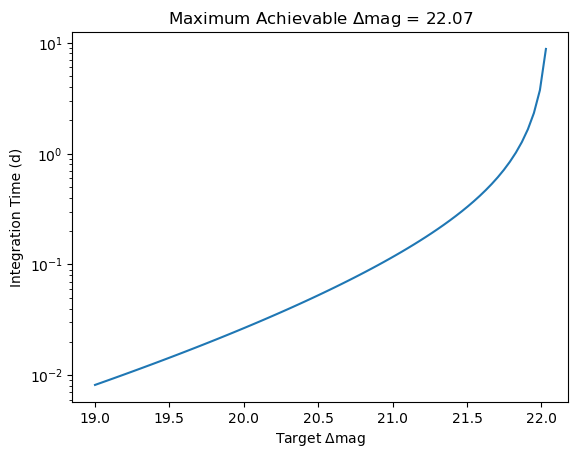

In [12]:
plt.figure()
plt.semilogy(dMags, intTimes)
plt.xlabel(r"Target $\Delta$mag")
plt.ylabel(f"Integration Time ({intTimes.unit})")
plt.title(fr"Maximum Achievable $\Delta$mag = {np.min(dMags[np.isnan(intTimes)]) :.2f}");